# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 3</span>

### <span style="color: #FF5733 "> Esercizio 03.1</span>

Il modello di Black-Scholes, assumendo che l'andamento del prezzo di un'opzione europea evolva secondo un moto browniano geometrico con drift e volatilità costanti, è in grado di fornire una formula analitica per il prezzo di un'opzione europea di di tipo CALL o di tipo PUT. Non appena si considerano opzioni più complesse o si abbandona l'ipotesi di moto browniano geometrico a drift e volatilità costanti, non è più possibile trovare una formula analitica per il prezzo, e si dimostra indispensabile l'utilizzo di tecniche Monte Carlo.  

Abbiamo stimato tramite una simulazione Monte Carlo il prezzo di un'opzione europea di tipo CALL e PUT, in modo da avere la soluzione analitica con cui confrontare il risultato e poterne così capire la bontà.  

Il guadagno di chi esercita l'opzione al momento della scadenza del contratto è dato da $max\left\{0,S(T)-K\right\}$ per la CALL e da $max\left\{0,K-S(T)\right\}$ per la PUT, dove S(T) è il prezzo del mercato al tempo T (in cui il writer potrà decidere se esercitare o meno l'opzione), mentre K è il prezzo prestabilito al tempo in cui si stipula il contratto. Scontando poi il profitto dell'interesse risk-free che si otterrebbe semplicemente deposiando i soldi in banca, si ha che il prezzo per un'opzione europea di tipo CALL si ottiene tramite:  
$$E[e^{-rT}(S(T)-K)^+]=\langle e^{-rT}(S(T)-K)^+ \rangle $$  
mentre quello per un'opzione di tipo PUT si ottiene tramite:  
$$E[e^{-rT}(K-S(T))^+]=\langle e^{-rT}(K-S(T))^+ \rangle $$
Con S(T) data da:  
 $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    con $W(t)\sim\mathcal{N}(0,t)$,  
    che si può discretizzare come:  
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$  

Ho stimato il prezzo delle opzioni di tipo CALL e PUT con i seguenti dati:
- prezzo dell'asset a $t=0$: $S(0)=100$
- $T=1$
- prezzo prestabilito $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$   
sia campionando direrramente S(t), sia campionando step per step usando la formula discretizzata (dividendo $[0,T]$ in $10^2$ sotto intervalli temporali).  

Si riportano di seguito i risultati ottenuti (il prezzo dell'opzione in funzione del numero di step) facendo 10000 step Monte Carlo divisi in 100 blocchi:

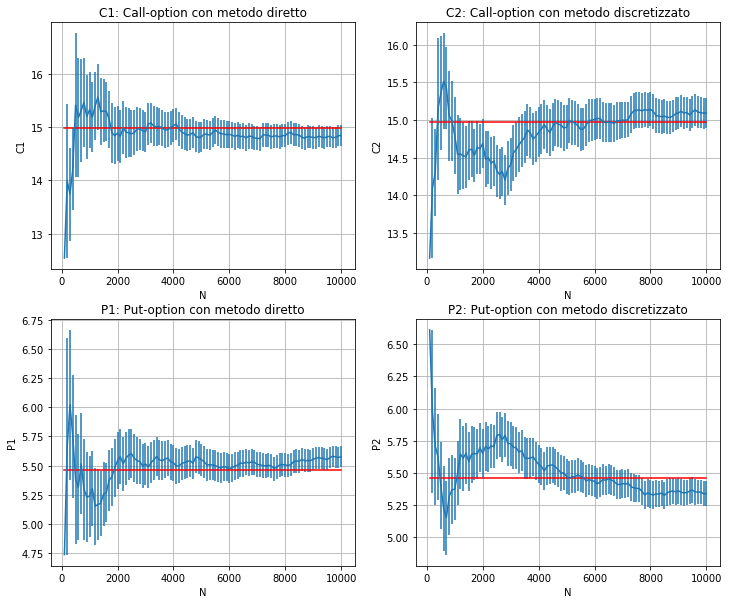

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
x, f, error = np.loadtxt("es03/C1.dat", usecols=(0,1,2), delimiter=',', unpack=True)
plt.errorbar(x,f,yerr=error)
t=np.full(x.size, 14.975790778311286)
plt.plot(x,t,c="red")
plt.xlabel('N')
plt.ylabel('C1')
plt.title('C1: Call-option con metodo diretto')
plt.grid(True)

plt.subplot(2,2,2)
x, f, error = np.loadtxt("es03/C2.dat", usecols=(0,1,2), delimiter=',', unpack=True)
plt.errorbar(x,f,yerr=error)
plt.plot(x,t,c="red")
plt.xlabel('N')
plt.ylabel('C2')
plt.title('C2: Call-option con metodo discretizzato')
plt.grid(True)

plt.subplot(2,2,3)
x, f, error = np.loadtxt("es03/P1.dat", usecols=(0,1,2), delimiter=',', unpack=True)
plt.errorbar(x,f,yerr=error)
t1=np.full(x.size, 5.4595325819072364)
plt.plot(x,t1,c="red")
plt.xlabel('N')
plt.ylabel('P1')
plt.title('P1: Put-option con metodo diretto')
plt.grid(True)

plt.subplot(2,2,4)
x, f, error = np.loadtxt("es03/P2.dat", usecols=(0,1,2), delimiter=',', unpack=True)
plt.errorbar(x,f,yerr=error)
plt.plot(x,t1,c="red")
plt.xlabel('N')
plt.ylabel('P2')
plt.title('P2: Put-option con metodo discretizzato')
plt.grid(True)

plt.show()

I risultati mostrano compatibilità tra il risultato ottenuto tramite le simulazioni (in blu nel grafico) e quello calcolato con la formula analitica ottenuta dalla teoria Black-Scholes (in rosso nel grafico).